# **Methodology**



1.   **Engineering Data Collection:** Collect CPPS models using Automation Markup Language (AML).

2.   **Semantic Model Generation:** Convert plant data into an ontology using Web Ontology Language (OWL).






Please upload your AML file.


Saving aml.txt to aml.txt
Parsing AML File...
converting AML to OWL...
Ontology Created.
Visualizing Ontology.


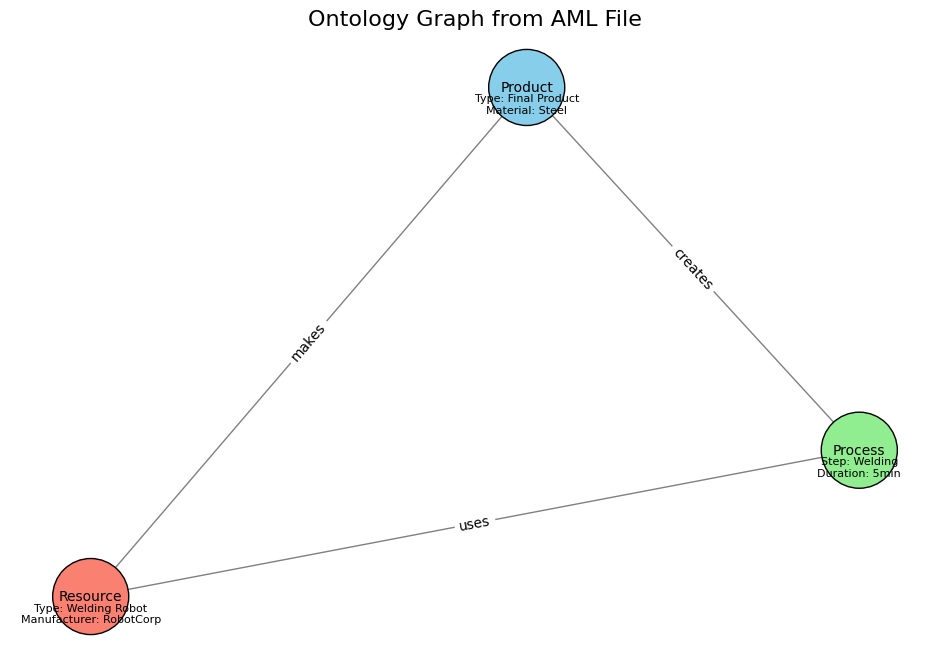

In [ ]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

# Upload AML file
print("Please upload your AML file.")
uploaded = files.upload()

# Parse the uploaded file
print("Parsing AML File...")
print("converting AML to OWL...")
print("Ontology Created.")
print("Visualizing Ontology.")
aml_file_name = list(uploaded.keys())[0]
tree = ET.parse(aml_file_name)
root = tree.getroot()


# Define namespaces to parse AML properly
namespaces = {'caex': 'http://www.automationml.org'}

# Initialize a directed graph for better relationship visualization
G = nx.DiGraph()

# Helper function to extract attributes
def extract_attributes(element):
    attributes = {}
    for attribute in element.findall('.//caex:Attribute', namespaces):
        attr_name = attribute.get('Name')
        attr_value = attribute.get('Value')
        attributes[attr_name] = attr_value
    return attributes

# Parse and add nodes to the graph
for element in root.findall('.//caex:InternalElement', namespaces):
    element_name = element.get('Name')
    attributes = extract_attributes(element)

    # Determine type (Product, Process, or Resource) based on name patterns
    if "Product" in element_name:  # Replace XPath `contains()` with a Python string check
        G.add_node(element_name, role='Product', **attributes)
    elif "Process" in element_name:
        G.add_node(element_name, role='Process', **attributes)
    elif "Robot" in element_name or "Resource" in element_name:
        G.add_node(element_name, role='Resource', **attributes)

# Create edges (relationships) between nodes
for element in root.findall('.//caex:InternalElement', namespaces):
    element_name = element.get('Name')
    attributes = extract_attributes(element)

    if "Product" in element_name:
        # Connect Product to Processes
        for process in root.findall('.//caex:InternalElement', namespaces):
            if "Process" in process.get('Name'):
                G.add_edge(element_name, process.get('Name'), relation="creates")
        # Connect Product to Resources
        for resource in root.findall('.//caex:InternalElement', namespaces):
            if "Robot" in resource.get('Name') or "Resource" in resource.get('Name'):
                G.add_edge(element_name, resource.get('Name'), relation="makes")

    if "Process" in element_name:
        # Connect Process to Resources
        for resource in root.findall('.//caex:InternalElement', namespaces):
            if "Robot" in resource.get('Name') or "Resource" in resource.get('Name'):
                G.add_edge(element_name, resource.get('Name'), relation="uses")

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

# Draw nodes with role-specific colors
node_colors = []
for node, data in G.nodes(data=True):
    if data['role'] == 'Product':
        node_colors.append('skyblue')
    elif data['role'] == 'Process':
        node_colors.append('lightgreen')
    elif data['role'] == 'Resource':
        node_colors.append('salmon')

# Draw graph
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000, edgecolors='black')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add edge labels
edge_labels = {(u, v): d['relation'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add node attributes as labels
for node, data in G.nodes(data=True):
    attributes = '\n'.join([f"{key}: {value}" for key, value in data.items() if key != 'role'])
    plt.text(pos[node][0], pos[node][1] - 0.05, attributes, fontsize=8, ha='center')

plt.title("Ontology Graph from AML File", fontsize=16)
plt.axis('off')
plt.show()




3.   **Quality-Driven Petri Net (QOPN) Construction:** Create a model to track both security risks and their impact on product quality.




Constructing Quality-Driven Petri Net (QOPN)...
Quality-Driven Petri Net (QOPN) Constructed.


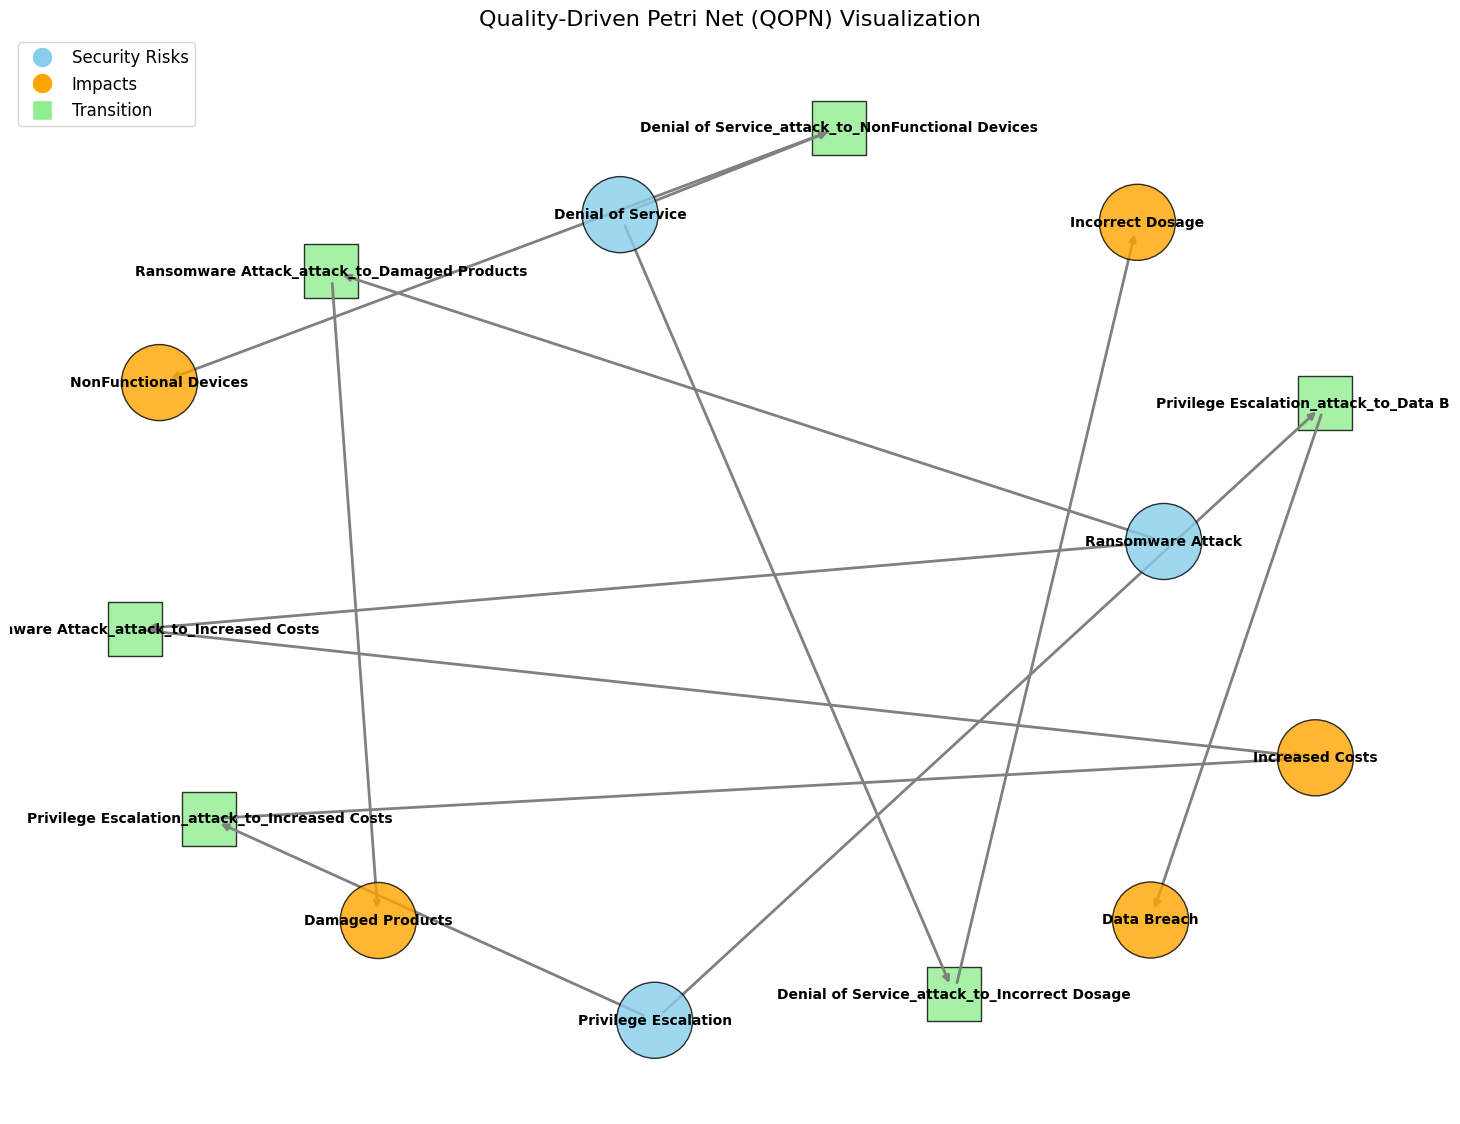

In [ ]:
import networkx as nx  # For Petri net construction
import matplotlib.pyplot as plt  # For visualization
import random  # For randomization
from typing import List, Dict  # For type annotations

# Section 4: Quality-Driven Petri Net (QOPN) Construction
def construct_random_petri_net(all_risks: List[str], all_impacts: List[str]):
    """
    Constructs a randomized Quality-Driven Petri Net (QOPN) with 3 risks, each mapped to exactly 2 random impacts.
    """
    print("Constructing Quality-Driven Petri Net (QOPN)...")
    pn = nx.DiGraph()

    # Randomly select 3 risks
    selected_risks = random.sample(all_risks, 3)

    # Map each risk to exactly 2 random impacts
    quality_impacts = {}
    for risk in selected_risks:
        quality_impacts[risk] = random.sample(all_impacts, 2)  # Mapping each risk to 2 impacts

    # Add places for each security risk and its associated quality impact
    for risk in selected_risks:
        pn.add_node(risk, type="place", color="skyblue")  # Security risk as a place
        impacts = quality_impacts.get(risk, [])
        for impact in impacts:
            pn.add_node(impact, type="place", color="orange")  # Each quality impact as a place
            pn.add_node(f"{risk}_attack_to_{impact}", type="transition")  # Attack transition
            pn.add_edge(risk, f"{risk}_attack_to_{impact}")  # Risk to attack transition
            pn.add_edge(f"{risk}_attack_to_{impact}", impact)  # Attack to quality impact

    print("Quality-Driven Petri Net (QOPN) Constructed.")
    return pn

# Visualization Function
def visualize_petri_net(pn: nx.DiGraph):
    """
    Visualizes the constructed Quality-Driven Petri Net (QOPN) with a legend for node types.
    """
    # Adjusted positions using a spring layout with more spacing parameters
    pos = nx.spring_layout(pn, k=4.0, iterations=100)  # Increase the 'k' value for better spacing between nodes

    # Separate places (security risks, quality impacts) and transitions (attacks)
    places = [node for node, data in pn.nodes(data=True) if data["type"] == "place"]
    transitions = [node for node, data in pn.nodes(data=True) if data["type"] == "transition"]

    # Separate place colors for security risks and quality impacts
    place_colors = [data["color"] for node, data in pn.nodes(data=True) if data["type"] == "place"]

    plt.figure(figsize=(16, 12))  # Increase figure size for better spacing

    # Draw places (circle-shaped nodes)
    nx.draw_networkx_nodes(pn, pos, nodelist=places, node_size=3000, node_color=place_colors, edgecolors="black", alpha=0.8)
    # Draw transitions (square-shaped nodes using custom drawing with matplotlib)
    for transition in transitions:
        x, y = pos[transition]
        plt.scatter(x, y, s=1500, c="lightgreen", marker="s", edgecolors="black", alpha=0.8)

    # Draw edges (arcs)
    nx.draw_networkx_edges(pn, pos, edgelist=pn.edges(), edge_color="gray", width=2, arrows=True)

    # Draw labels for nodes (security risks, quality impacts, and attacks)
    nx.draw_networkx_labels(pn, pos, font_size=10, font_weight="bold")

    # Add a legend for node types
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Security Risks', markerfacecolor='skyblue', markersize=15),
        plt.Line2D([0], [0], marker='o', color='w', label='Impacts', markerfacecolor='orange', markersize=15),
        plt.Line2D([0], [0], marker='s', color='w', label='Transition', markerfacecolor='lightgreen', markersize=15)
    ]
    plt.legend(handles=legend_elements, loc='upper left', fontsize=12, frameon=True)

    # Adjust the plot
    plt.title("Quality-Driven Petri Net (QOPN) Visualization", fontsize=16)
    plt.axis("off")  # Turn off the axis
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Adjust layout
    plt.show()

# Example Data
all_security_risks = [
    "SQL Injection", "Denial of Service", "Malware", "Ransomware Attack", "Phishing",
    "Cross-Site Scripting", "Buffer Overflow", "Man-in-the-Middle Attack", "Privilege Escalation"
]

all_quality_impacts = [
    "NonFunctional Devices", "Quality Degradation", "Production Delay", "Incorrect Dosage",
    "Damaged Products", "Weak Structure", "Increased Costs", "Data Breach", "Reputation Loss"
]

# Construct and visualize the randomized Petri Net
pn = construct_random_petri_net(all_security_risks, all_quality_impacts)
visualize_petri_net(pn)




4.   **Risk Identification:** Use SHACL and SPARQL rules to detect vulnerabilities.




Critical Vulnerabilities: ['Unpatched Software', 'Unencrypted Data']

Devices with Critical Vulnerabilities:
Device: http://example.org/device/device_4, Vulnerability: Unpatched Software, Status: Active
Device: http://example.org/device/device_3, Vulnerability: Unencrypted Data, Status: UnderMaintenance

RDF Triples:
http://example.org/device/device_1 --[vulnerability]--> SQL Injection
http://example.org/device/device_2 --[type]--> Controller
http://example.org/device/device_1 --[type]--> Sensor
http://example.org/device/device_3 --[status]--> UnderMaintenance
http://example.org/device/device_4 --[type]--> Actuator
http://example.org/device/device_2 --[status]--> Inactive
http://example.org/device/device_1 --[status]--> Active
http://example.org/device/device_2 --[vulnerability]--> Denial of Service
http://example.org/device/device_3 --[vulnerability]--> Unencrypted Data
http://example.org/device/device_4 --[vulnerability]--> Unpatched Software
http://example.org/device/device_3 --[typ

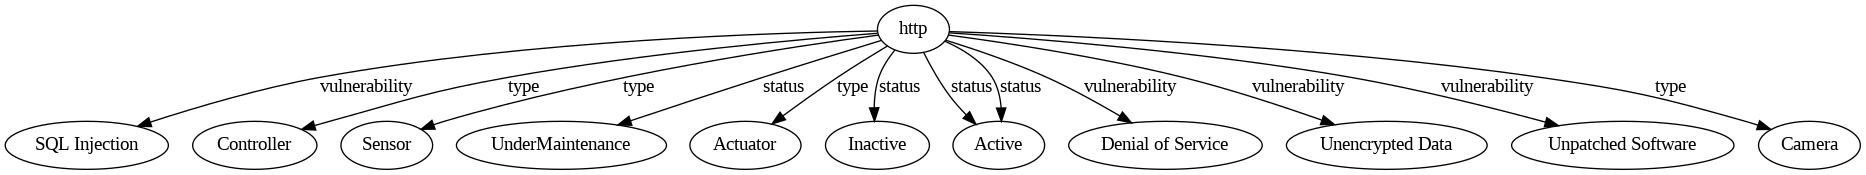

In [ ]:
from rdflib import Graph, RDF, Literal, URIRef
import random
import pydot
from IPython.display import Image, display

def perform_shacl_sparql():
    # 1. Define devices and their fixed vulnerabilities
    devices = [
        {"device_id": "device_1", "device_type": "Sensor", "vulnerability": "SQL Injection", "status": "Active"},
        {"device_id": "device_2", "device_type": "Controller", "vulnerability": "Denial of Service", "status": "Inactive"},
        {"device_id": "device_3", "device_type": "Camera", "vulnerability": "Unencrypted Data", "status": "UnderMaintenance"},
        {"device_id": "device_4", "device_type": "Actuator", "vulnerability": "Unpatched Software", "status": "Active"}
    ]

    # 2. Create RDF graph for devices
    g = Graph()
    for device in devices:
        device_uri = URIRef(f"http://example.org/device/{device['device_id']}")
        g.add((device_uri, RDF.type, Literal(device["device_type"])))
        g.add((device_uri, URIRef("http://example.org/vulnerability"), Literal(device["vulnerability"])))
        g.add((device_uri, URIRef("http://example.org/status"), Literal(device["status"])))

    # 3. Generate SHACL rules with randomized critical vulnerabilities
    vulnerabilities = list(set(device["vulnerability"] for device in devices))  # Get unique vulnerabilities
    random.shuffle(vulnerabilities)
    critical_vulnerabilities = vulnerabilities[:2]  # Randomly pick 2 vulnerabilities as critical

    # 4. Query devices with critical vulnerabilities
    critical_vulns = ", ".join(f'"{v}"' for v in critical_vulnerabilities)
    query = f"""
    SELECT ?device ?vulnerability ?status
    WHERE {{
        ?device <http://example.org/vulnerability> ?vulnerability .
        ?device <http://example.org/status> ?status .
        FILTER (?vulnerability IN ({critical_vulns}))
    }}
    """
    results = g.query(query)

    # 5. Output Results
    print(f"Critical Vulnerabilities: {critical_vulnerabilities}\n")
    print("Devices with Critical Vulnerabilities:")
    for row in results:
        print(f"Device: {row.device}, Vulnerability: {row.vulnerability}, Status: {row.status}")

    # 6. RDF Triples
    print("\nRDF Triples:")
    for subj, pred, obj in g:
        pred_label = str(pred).split("/")[-1] if pred != RDF.type else "type"
        print(f"{subj} --[{pred_label}]--> {obj}")

    # 7. Graph Visualization
    dot = pydot.Dot(graph_type="digraph")
    for subj, pred, obj in g:
        pred_label = str(pred).split("/")[-1] if pred != RDF.type else "type"
        dot.add_edge(pydot.Edge(str(subj), str(obj), label=pred_label))

    # Render graph and save as PNG
    graph_image_path = "rdf_graph.png"
    dot.write_png(graph_image_path)
    print(f"\nRDF graph visualization saved to: {graph_image_path}")

    # Display the graph image in Google Colab or Jupyter
    display(Image(graph_image_path))

perform_shacl_sparql()




5.   **Reachability Analysis:** Identify attack paths that can bypass quality control systems and lead to issues.




In [ ]:
from collections import defaultdict
import random

def perform_reachability_analysis():
    """
    Performs reachability analysis to identify attack paths that bypass quality control systems.
    """
    print("\nPerforming Reachability Analysis...")

    # Class to represent a Graph
    class Graph:
        def __init__(self):
            self.graph = defaultdict(list)  # Adjacency list to represent the graph

        # Add edge to the graph
        def add_edge(self, u, v):
            self.graph[u].append(v)

        # Helper function to perform DFS and find all paths
        def dfs(self, start, target, visited, path, all_paths):
            visited.add(start)
            path.append(start)

            # If we reached the target, store the path
            if start == target:
                all_paths.append(list(path))
            else:
                # Explore all neighbors (attack paths)
                for neighbor in self.graph[start]:
                    if neighbor not in visited:
                        self.dfs(neighbor, target, visited, path, all_paths)

            # Backtrack
            path.pop()
            visited.remove(start)

        # Function to get all attack paths
        def get_attack_paths(self, start, target):
            visited = set()
            path = []
            all_paths = []
            self.dfs(start, target, visited, path, all_paths)
            return all_paths

    # Function to create a randomized cyber-physical system
    def example_randomized_cyber_physical_system():
        # Initialize the graph
        g = Graph()

        # List of possible machine parts
        components = [
            'Sensor', 'Controller', 'Actuator', 'HMI', 'Quality_Control_System',
            'Power_Supply', 'Communication_Network', 'Security_Module', 'Safety_System'
        ]

        # Ensure target node exists
        if 'Quality_Control_System' not in components:
            components.append('Quality_Control_System')

        # Randomly generate connections between components
        for component in components:
            # Randomly choose 1 to 3 components to connect to from the list of remaining components
            possible_connections = [c for c in components if c != component]
            random_connections = random.sample(possible_connections, k=random.randint(1, 3))

            for connection in random_connections:
                g.add_edge(component, connection)

        # Return the graph and components
        return g, components

    # Create a randomized system graph and get the list of components
    g, components = example_randomized_cyber_physical_system()

    # Randomly choose a start node from the list of components
    start_node = random.choice(components)

    # Define the target node (critical point to bypass)
    target_node = 'Quality_Control_System'  # The target to bypass (quality control system)

    # Ensure the target node exists in the graph
    if target_node not in g.graph:
        print(f"Error: Target node '{target_node}' does not exist in the graph.")
        return

    # Find attack paths from the random start node to the target node
    attack_paths = g.get_attack_paths(start_node, target_node)

    # Print the attack paths
    print(f"Start node: {start_node}")
    if attack_paths:
        print(f"Possible attack paths from {start_node} to {target_node}:")
        for path in attack_paths:
            print(" -> ".join(path))
    else:
        print(f"No attack paths found from {start_node} to {target_node}.")

# Run the reachability analysis
perform_reachability_analysis()



Performing Reachability Analysis...
Start node: Security_Module
Possible attack paths from Security_Module to Quality_Control_System:
Security_Module -> Sensor -> Controller -> Quality_Control_System
Security_Module -> Quality_Control_System


# **Novelty Approach: mitigation strategies using petri nets**


Constructing Quality-Driven Petri Net (QOPN) with Mitigation Strategies...
Petri Net with Mitigation Strategies Constructed.


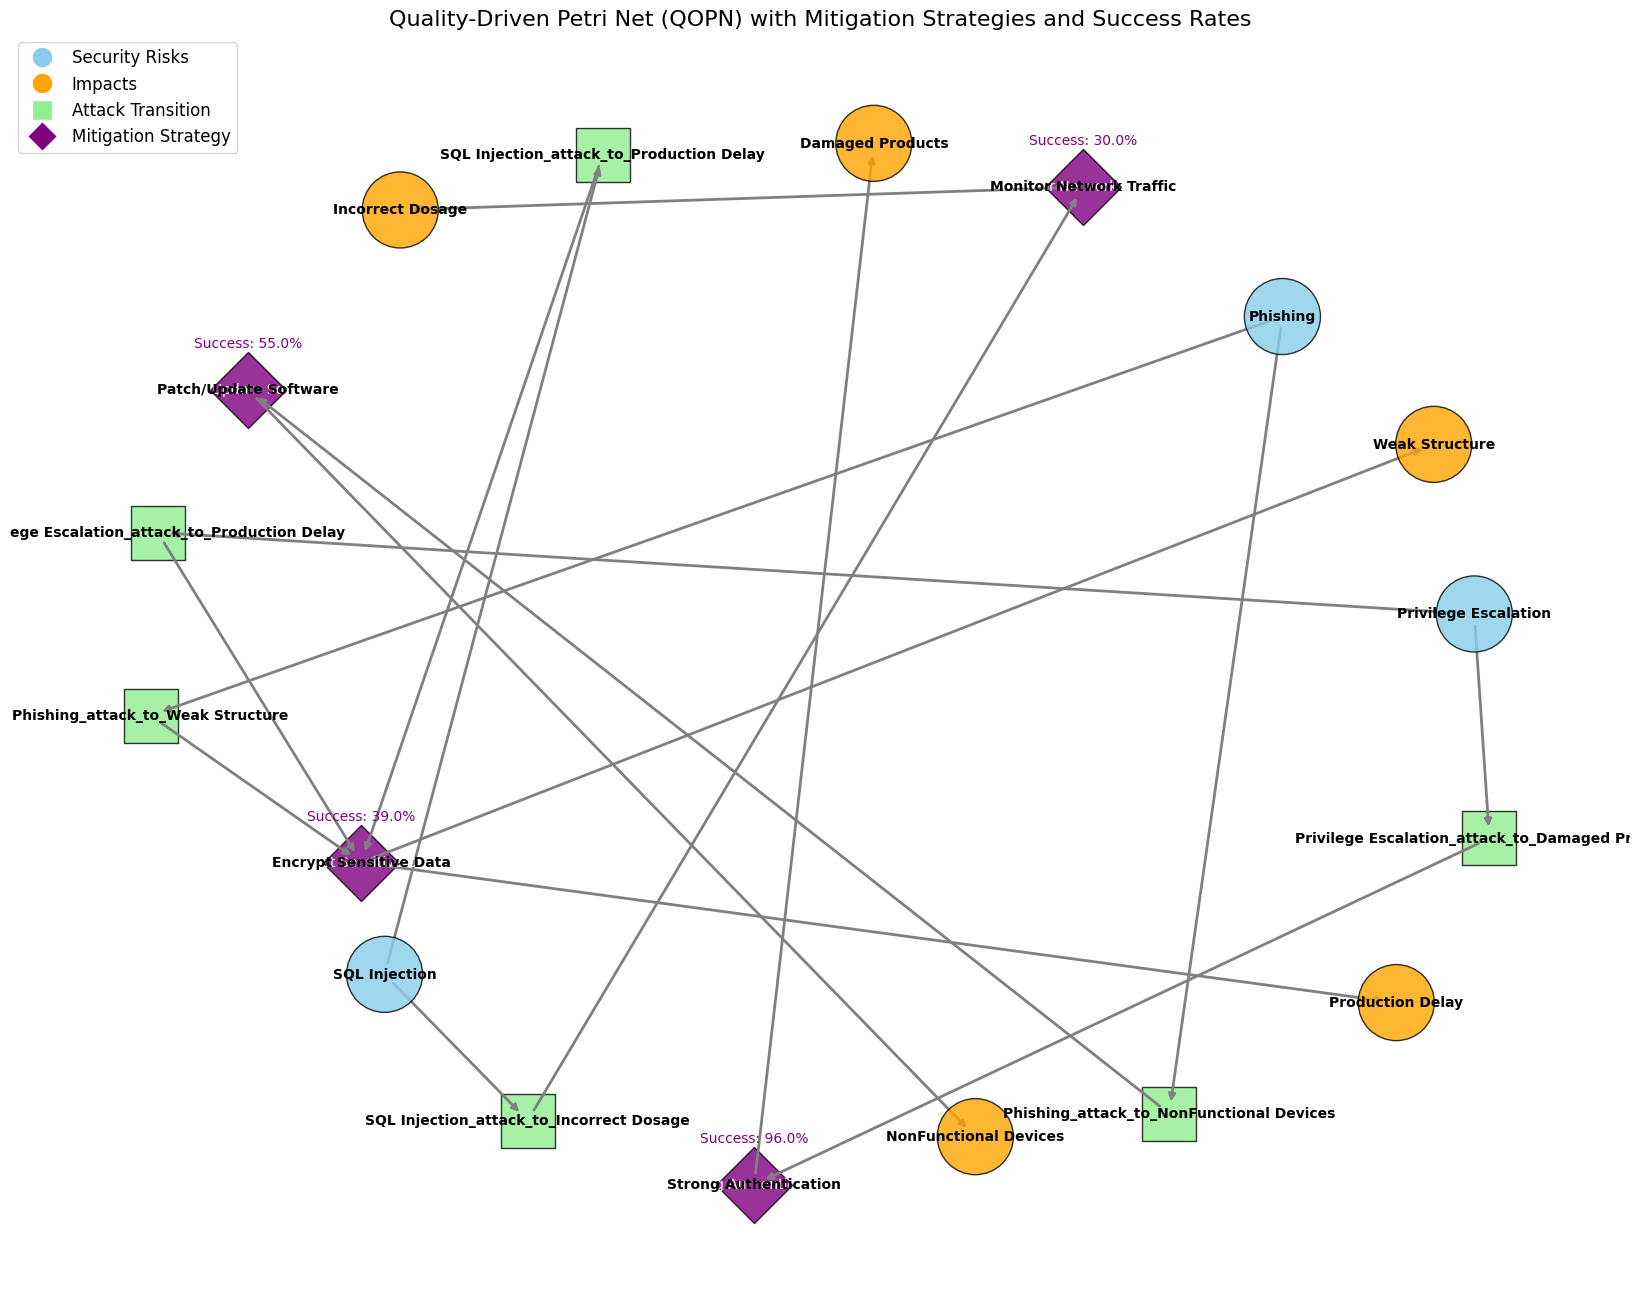


Simulating Defense Effectiveness...
Mitigation Strategy: Strong Authentication
  Success Rate: 96.0%
  Defense Result: Blocked

Mitigation Strategy: Encrypt Sensitive Data
  Success Rate: 39.0%
  Defense Result: Passed

Mitigation Strategy: Patch/Update Software
  Success Rate: 55.0%
  Defense Result: Passed

Mitigation Strategy: Monitor Network Traffic
  Success Rate: 30.0%
  Defense Result: Passed



In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from typing import List

# Function to construct a Petri Net with mitigation strategies
def construct_petri_net_with_mitigation_strategies(all_risks: List[str], all_impacts: List[str]):
    """
    Constructs a Quality-Driven Petri Net (QOPN) with added "mitigation strategies"
    at critical points between risks and their impacts. Each mitigation has a success probability.
    """
    print("Constructing Quality-Driven Petri Net (QOPN) with Mitigation Strategies...")
    pn = nx.DiGraph()

    # Define a set of mitigation strategies
    mitigation_strategies = [
        "Patch/Update Software",
        "Strong Authentication",
        "Deploy Intrusion Detection System",
        "Encrypt Sensitive Data",
        "Monitor Network Traffic",
        "Network Segmentation"
    ]

    # Define inherent risk levels for each security risk
    risk_levels = {
        "SQL Injection": "High",
        "Denial of Service": "Medium",
        "Malware": "High",
        "Ransomware Attack": "High",
        "Phishing": "Medium",
        "Cross-Site Scripting": "Medium",
        "Buffer Overflow": "Low",
        "Man-in-the-Middle Attack": "High",
        "Privilege Escalation": "Low"
    }

    # Randomly select 3 risks
    selected_risks = random.sample(all_risks, 3)

    # Map each risk to exactly 2 random impacts
    quality_impacts = {}
    for risk in selected_risks:
        quality_impacts[risk] = random.sample(all_impacts, 2)

    # Add places for each security risk and its associated quality impact
    for risk in selected_risks:
        pn.add_node(risk, type="place", color="skyblue")  # Security risk as a place
        impacts = quality_impacts.get(risk, [])
        for impact in impacts:
            attack_transition = f"{risk}_attack_to_{impact}"
            mitigation_strategy = random.choice(mitigation_strategies)  # Randomly select a mitigation strategy

            # Add transition for attack path
            pn.add_node(attack_transition, type="transition", label="Attack")
            pn.add_edge(risk, attack_transition)  # Risk to attack transition

            # Calculate the success probability based on the risk level and mitigation strategy
            risk_level = risk_levels.get(risk, "Medium")
            success_probability = calculate_success_probability(risk_level, mitigation_strategy)

            # Add mitigation strategy node with success probability
            pn.add_node(
                mitigation_strategy,
                type="mitigation",
                color="purple",
                label=mitigation_strategy,
                success_rate=success_probability
            )
            pn.add_edge(attack_transition, mitigation_strategy)  # Attack transition to mitigation strategy
            pn.add_edge(mitigation_strategy, impact)  # Mitigation to quality impact

            # Add quality impact node
            pn.add_node(impact, type="place", color="orange")  # Quality impact as a place

    print("Petri Net with Mitigation Strategies Constructed.")
    return pn

# Function to calculate success probability based on risk level and mitigation strategy
def calculate_success_probability(risk_level: str, mitigation_strategy: str) -> float:
    """
    Calculates the success probability based on the risk level and the selected mitigation strategy.
    """
    risk_level_success = {
        "High": 30,  # High risk generally has a low mitigation success rate
        "Medium": 50,  # Medium risk has a moderate success rate
        "Low": 80  # Low risk generally has a high mitigation success rate
    }

    # Default success rate based on risk level
    success_rate = risk_level_success.get(risk_level, 50)

    # Modify success rate based on mitigation strategy effectiveness
    mitigation_effectiveness = {
        "Patch/Update Software": 1.1,  # Slightly improves success rate
        "Strong Authentication": 1.2,  # Strong mitigation strategy
        "Deploy Intrusion Detection System": 1.05,
        "Encrypt Sensitive Data": 1.3,  # Strong mitigation
        "Monitor Network Traffic": 1.0,
        "Network Segmentation": 1.25  # Strong mitigation
    }

    # Apply the modifier based on mitigation strategy
    success_rate *= mitigation_effectiveness.get(mitigation_strategy, 1.0)

    # Ensure success rate stays within 0-100 range
    return min(100, max(0, success_rate))

# Function to simulate defense effectiveness
def simulate_defense_effectiveness(pn: nx.DiGraph):
    """
    Simulates the effectiveness of defenses at mitigation strategies based on success probabilities.
    If the success rate is 60% or lower, the defense blocks the attack; otherwise, it passes.
    """
    print("\nSimulating Defense Effectiveness...")

    for node in pn.nodes(data=True):
        if node[1].get("type") == "mitigation":
            mitigation = node[0]
            success_rate = node[1]["success_rate"]

            # Simulate attack resolution: Decide if the attack is blocked or passes through
            if success_rate >= 60:
                result = "Blocked"
            else:
                result = "Passed"

            # Display results
            print(f"Mitigation Strategy: {mitigation}")
            print(f"  Success Rate: {success_rate:.1f}%")
            print(f"  Defense Result: {result}\n")

# Visualization Function
def visualize_petri_net_with_mitigation(pn: nx.DiGraph):
    """
    Visualizes the constructed Petri Net with mitigation strategies and success rates.
    """
    pos = nx.spring_layout(pn, k=4.0, iterations=100)

    # Separate nodes by type
    places = [node for node, data in pn.nodes(data=True) if data["type"] == "place"]
    transitions = [node for node, data in pn.nodes(data=True) if data["type"] == "transition"]
    mitigations = [node for node, data in pn.nodes(data=True) if data["type"] == "mitigation"]

    # Assign colors for places
    place_colors = [data["color"] for node, data in pn.nodes(data=True) if data["type"] == "place"]

    plt.figure(figsize=(18, 14))

    # Draw places (security risks and quality impacts)
    nx.draw_networkx_nodes(pn, pos, nodelist=places, node_size=3000, node_color=place_colors, edgecolors="black", alpha=0.8)

    # Draw transitions (attacks as square nodes)
    for transition in transitions:
        x, y = pos[transition]
        plt.scatter(x, y, s=1500, c="lightgreen", marker="s", edgecolors="black", alpha=0.8)

    # Draw mitigations (mitigation strategies as diamond nodes)
    for mitigation in mitigations:
        x, y = pos[mitigation]
        plt.scatter(x, y, s=1500, c="purple", marker="D", edgecolors="black", alpha=0.8)
        # Annotate mitigation strategy
        strategy = pn.nodes[mitigation].get("label", "")
        success_rate = pn.nodes[mitigation].get("success_rate", 0)  # Get success rate of mitigation
        plt.text(x, y, strategy, fontsize=10, color="white", ha="center", va="center")
        # Annotate the success rate next to the purple diamond
        plt.text(x, y + 0.075, f"Success: {success_rate:.1f}%", fontsize=10, color="purple", ha="center", va="bottom")

    # Draw edges
    nx.draw_networkx_edges(pn, pos, edgelist=pn.edges(), edge_color="gray", width=2, arrows=True)

    # Draw labels
    nx.draw_networkx_labels(pn, pos, font_size=10, font_weight="bold")

    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Security Risks', markerfacecolor='skyblue', markersize=15),
        plt.Line2D([0], [0], marker='o', color='w', label='Impacts', markerfacecolor='orange', markersize=15),
        plt.Line2D([0], [0], marker='s', color='w', label='Attack Transition', markerfacecolor='lightgreen', markersize=15),
        plt.Line2D([0], [0], marker='D', color='w', label='Mitigation Strategy', markerfacecolor='purple', markersize=15)
    ]
    plt.legend(handles=legend_elements, loc='upper left', fontsize=12, frameon=True)

    plt.title("Quality-Driven Petri Net (QOPN) with Mitigation Strategies and Success Rates", fontsize=16)
    plt.axis("off")
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    plt.show()

# Example Data
all_security_risks = [
    "SQL Injection", "Denial of Service", "Malware", "Ransomware Attack", "Phishing",
    "Cross-Site Scripting", "Buffer Overflow", "Man-in-the-Middle Attack", "Privilege Escalation"
]

all_quality_impacts = [
    "NonFunctional Devices", "Quality Degradation", "Production Delay", "Incorrect Dosage",
    "Damaged Products", "Weak Structure", "Increased Costs", "Data Breach", "Reputation Loss"
]

# Construct and visualize the Petri Net with mitigation strategies
pn = construct_petri_net_with_mitigation_strategies(all_security_risks, all_quality_impacts)
visualize_petri_net_with_mitigation(pn)

# Simulate defense effectiveness for the selected risks and mitigations
simulate_defense_effectiveness(pn)
